In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [2]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 93% 14.0M/15.1M [00:00<00:00, 143MB/s]
100% 15.1M/15.1M [00:00<00:00, 150MB/s]


In [3]:

import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten



In [4]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('abdulmalik file has been extracted')

abdulmalik file has been extracted


In [5]:
 import os
import cv2
from tqdm import tqdm

# Path to the 'yes' directory
yes_dir = '/content/yes'

# Load images from the 'yes' directory
X_yes = []
y_yes = []
for file_name in tqdm(os.listdir(yes_dir)):
    img_path = os.path.join(yes_dir, file_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        X_yes.append(img)
        y_yes.append(file_name[0])
    else:
        print('Failed to load image:', img_path)

# Path to the 'no' directory
no_dir = '/content/no'

# Load images from the 'no' directory
X_no = []
y_no = []
for file_name in tqdm(os.listdir(no_dir)):
    img_path = os.path.join(no_dir, file_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        X_no.append(img)
        y_no.append('N')
    else:
        print('Failed to load image:', img_path)

# Combine the data from 'yes' and 'no' directories
X = X_yes + X_no
y = y_yes + y_no

print(y)


100%|██████████| 98/98 [00:00<00:00, 598.54it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

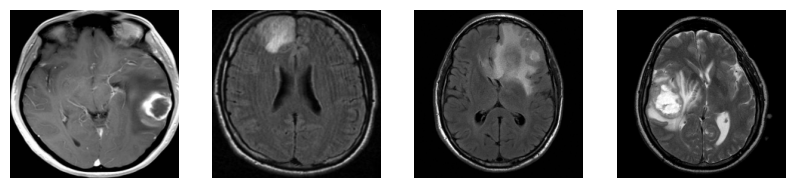

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [8]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [9]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


In [10]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224 


vgg = vgg16.VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58889256/58889256 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [26]:
 def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    
    top_model = Dense(num_classes,activation='softmax')(top_model)

    return top_model 

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [13]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [14]:
history = model.fit(X_train,y_train,
                    epochs=5, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/5
6/6 [==============================] - 100s 17s/step - loss: 8.1583 - accuracy: 0.4911 - val_loss: 0.8956 - val_accuracy: 0.6071
Epoch 2/5
6/6 [==============================] - 99s 17s/step - loss: 0.6604 - accuracy: 0.7219 - val_loss: 0.4412 - val_accuracy: 0.8333
Epoch 3/5
6/6 [==============================] - 106s 19s/step - loss: 0.4006 - accuracy: 0.8343 - val_loss: 0.4615 - val_accuracy: 0.7500
Epoch 4/5
6/6 [==============================] - 107s 19s/step - loss: 0.3161 - accuracy: 0.8817 - val_loss: 0.3996 - val_accuracy: 0.8214
Epoch 5/5
6/6 [==============================] - 98s 17s/step - loss: 0.2399 - accuracy: 0.8994 - val_loss: 0.3287 - val_accuracy: 0.8452


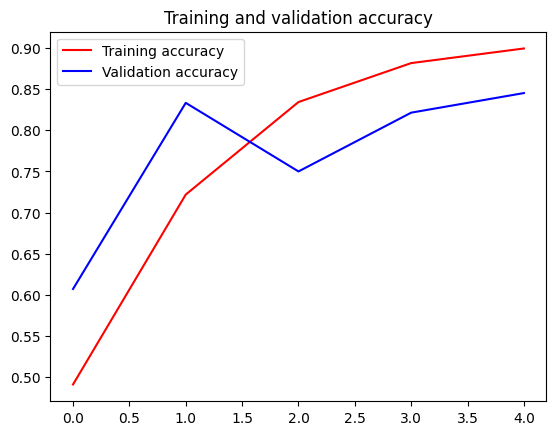

<Figure size 640x480 with 0 Axes>

In [15]:
 import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the predictions from the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Convert one-hot encoded y_test back to class labels
y_true = np.argmax(y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)



3/3 [==============================] - 33s 10s/step
Confusion Matrix:
[[31  2]
 [11 40]]


In [18]:
# Predict classes for the test set using the pretrained model
y_pred_vgg = model.predict(X_test)
y_pred_classes_vgg = np.argmax(y_pred_vgg, axis=1)

# Calculate accuracy
accuracy_vgg = np.mean(y_pred_classes_vgg == y_test_classes)
print("VGG16 Accuracy:", accuracy_vgg)

# Calculate precision, recall, and F1-score
precision_vgg = precision_score(y_test_classes, y_pred_classes_vgg)
recall_vgg = recall_score(y_test_classes, y_pred_classes_vgg)
f1_vgg = f1_score(y_test_classes, y_pred_classes_vgg)

print("VGG16 Precision:", precision_vgg)
print("VGG16 Recall:", recall_vgg)
print("VGG16 F1-score:", f1_vgg)


3/3 [==============================] - 33s 10s/step
VGG16 Accuracy: 0.8452380952380952
VGG16 Precision: 0.9523809523809523
VGG16 Recall: 0.7843137254901961
VGG16 F1-score: 0.8602150537634408
